In [ ]:
#I have selected the FIFA17 dataset from Kaggle that has a database of 17000 players and sources their attributes from the 
#FIFA17 console game. 

In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#We load the automobile dataset and create the dataframes

df = pd.read_csv('C:/Users/matet/Dropbox/Matete Nchabeleng-81377/Data Analytics and Exploration/Task 18/fifa.csv')
df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [5]:
#We'll be dropping these columns because they won't be part of our analysis
df.drop(['National_Position','National_Kit'], axis =1)

,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,80 kg,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,72 kg,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,68 kg,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,85 kg,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,92 kg,...,16,14,11,47,11,91,89,95,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,Wexford Youths,Sub,30.0,02/01/2016,2020.0,45,183 cm,82 kg,...,13,11,13,15,12,39,44,52,41,46
17584,Dylan McGoey,Republic of Ireland,Longford Town,Sub,28.0,01/01/2016,2020.0,45,185 cm,80 kg,...,11,12,13,16,12,47,39,46,46,46
17585,Tommy Ouldridge,England,Swindon Town,Res,32.0,03/03/2015,2023.0,45,173 cm,61 kg,...,42,35,36,42,37,15,7,13,14,7
17586,Mark Foden,Scotland,Ross County,Sub,45.0,03/02/2016,2017.0,45,180 cm,80 kg,...,12,13,12,24,12,40,45,44,43,45


In [3]:
#We can remove dupliate rows
df = df.drop_duplicates()
print(df)

                    Name          Nationality National_Position  National_Kit  \
0      Cristiano Ronaldo             Portugal                LS           7.0   
1           Lionel Messi            Argentina                RW          10.0   
2                 Neymar               Brazil                LW          10.0   
3            Luis Suárez              Uruguay                LS           9.0   
4           Manuel Neuer              Germany                GK           1.0   
...                  ...                  ...               ...           ...   
17583        Adam Dunbar  Republic of Ireland               NaN           NaN   
17584       Dylan McGoey  Republic of Ireland               NaN           NaN   
17585    Tommy Ouldridge              England               NaN           NaN   
17586         Mark Foden             Scotland               NaN           NaN   
17587   Barry Richardson              England               NaN           NaN   

                 Club Club_

In [4]:
#We can look through to see if there are any null fields in the dataset
df.replace('?',np.nan, inplace=True)
          
df.isnull().sum()

Name                      0
Nationality               0
National_Position     16513
National_Kit          16513
Club                      0
Club_Position             1
Club_Kit                  1
Club_Joining              1
Contract_Expiry           1
Rating                    0
Height                    0
Weight                    0
Preffered_Foot            0
Birth_Date                0
Age                       0
Preffered_Position        0
Work_Rate                 0
Weak_foot                 0
Skill_Moves               0
Ball_Control              0
Dribbling                 0
Marking                   0
Sliding_Tackle            0
Standing_Tackle           0
Aggression                0
Reactions                 0
Attacking_Position        0
Interceptions             0
Vision                    0
Composure                 0
Crossing                  0
Short_Pass                0
Long_Pass                 0
Acceleration              0
Speed                     0
Stamina             

In [6]:
#We create a temporary dataset 
temp_df = df
temp_df.dropna(inplace=True)
temp_df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [7]:
#We can get a summary of our data by using the describe function & will return the mean,count,std deviation among others
df.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,...,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.00000
mean,12.219535,33.228837,2019.501395,74.257674,26.911628,3.134884,2.468837,64.111628,60.505116,48.771163,...,54.405581,53.191628,49.273488,53.766512,49.807442,18.975814,19.072558,18.464186,18.680930,19.16093
std,6.933187,35.721738,1.595719,6.955942,3.858605,0.739572,0.895731,19.283502,21.556057,24.711929,...,21.749787,21.225984,20.590618,18.003269,20.899804,21.455670,21.925053,20.420290,21.154472,22.49633
min,1.000000,1.000000,2017.000000,52.000000,17.000000,1.000000,1.000000,12.000000,7.000000,4.000000,...,6.000000,9.000000,7.000000,10.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,6.000000,9.000000,2018.000000,70.000000,24.000000,3.000000,2.000000,60.000000,54.000000,23.000000,...,40.000000,37.000000,33.000000,42.000000,33.500000,9.000000,8.000000,8.000000,8.000000,8.00000
50%,12.000000,18.000000,2019.000000,74.000000,27.000000,3.000000,2.000000,70.000000,67.000000,55.000000,...,62.000000,59.000000,53.000000,57.000000,54.000000,12.000000,12.000000,12.000000,11.000000,11.00000
75%,18.000000,35.500000,2020.000000,79.000000,30.000000,4.000000,3.000000,76.000000,75.000000,71.000000,...,71.000000,69.000000,66.000000,67.000000,66.000000,15.000000,15.000000,15.000000,14.000000,14.00000
max,36.000000,99.000000,2023.000000,94.000000,44.000000,5.000000,5.000000,95.000000,97.000000,92.000000,...,91.000000,92.000000,91.000000,90.000000,91.000000,91.000000,89.000000,95.000000,91.000000,90.00000


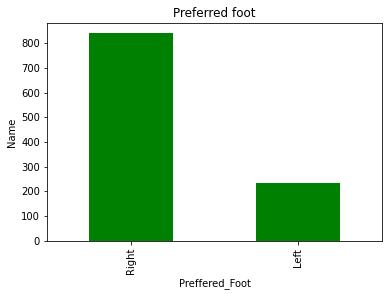

In [15]:
#Bar chart showing the split of players based on their dominant foot
temp_df['Preffered_Foot'].value_counts().plot(kind='bar',color='green')
plt.title("Preferred foot")
plt.ylabel('Name')
plt.xlabel('Preffered_Foot');

Text(0.5, 0, 'Contract_Expiry')

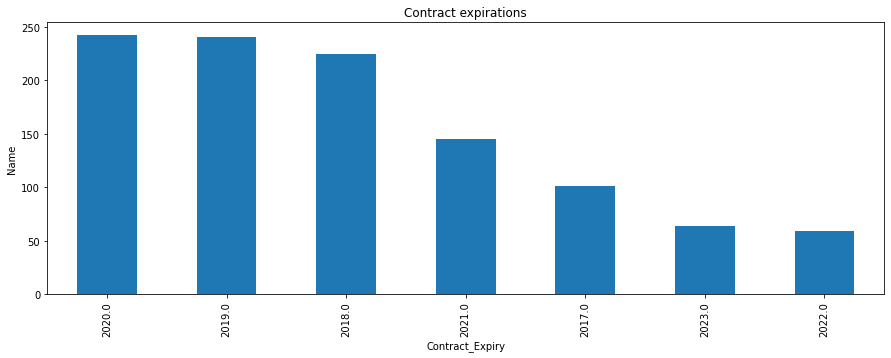

In [21]:
#Bar chart showing in which year contracts expire
temp_df.Contract_Expiry.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Contract expirations")
plt.ylabel('Name')
plt.xlabel('Contract_Expiry')

c:\users\matet\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


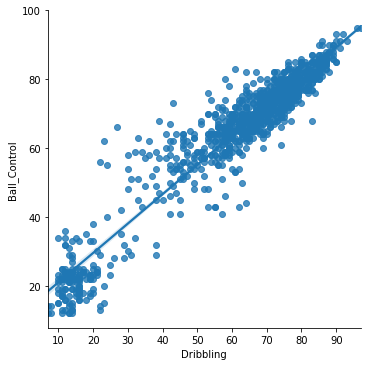

In [36]:
#Scatter plot showing the relationship between Ball control & Dribbling Skill_Moves
scatter_plot= sns.lmplot('Dribbling','Ball_Control', temp_df);

Text(0.5, 0, 'Preffered_Position')

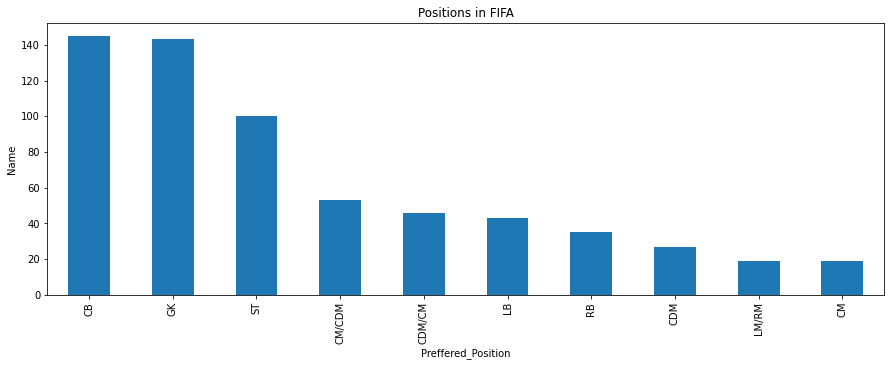

In [24]:
#Position distribution of players on FIFA
temp_df.Preffered_Position.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Positions in FIFA")
plt.ylabel('Name')
plt.xlabel('Preffered_Position')

Text(0.5, 0, 'Club')

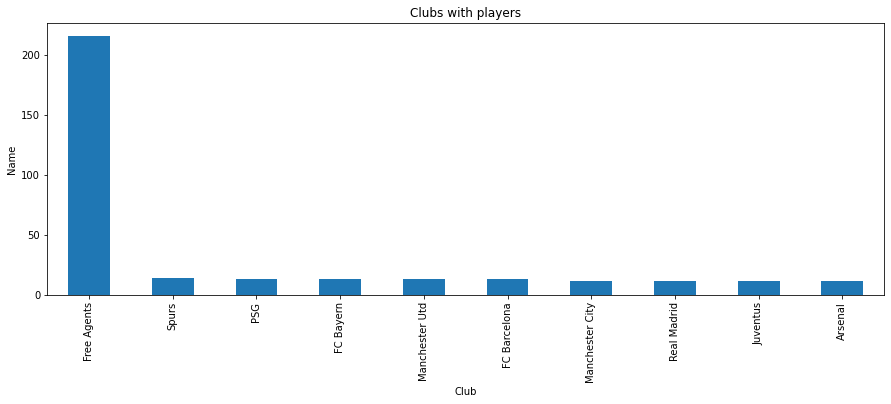

In [43]:
temp_df.Club.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Clubs with players")
plt.ylabel('Name')
plt.xlabel('Club')

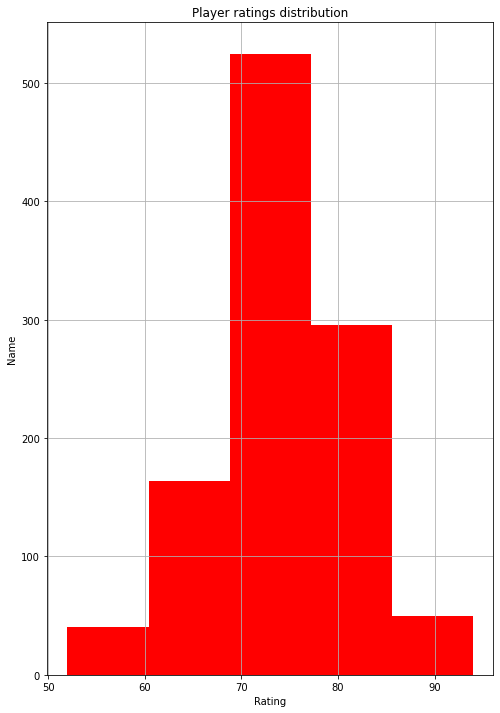

In [28]:
fig = plt.figure(figsize = (8,12))
temp_df['Rating'].hist(bins=5,color='red');
plt.title("Player ratings distribution")
plt.ylabel('Name')
plt.xlabel('Rating');

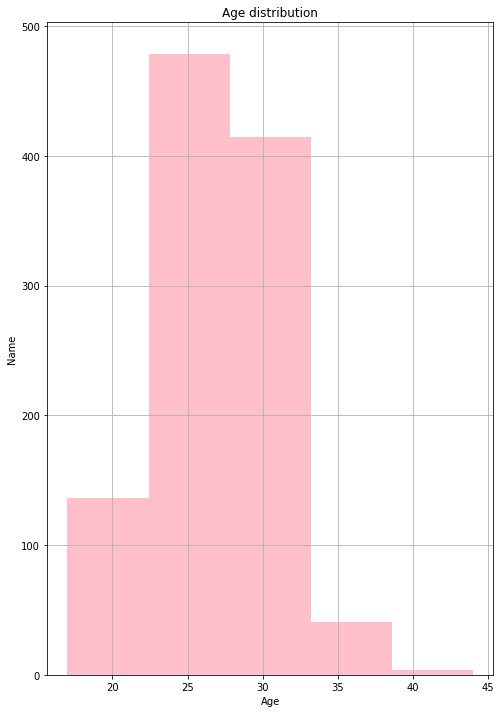

In [38]:
fig = plt.figure(figsize = (8,12))
temp_df['Age'].hist(bins=5,color='pink');
plt.title("Age distribution")
plt.ylabel('Name')
plt.xlabel('Age');

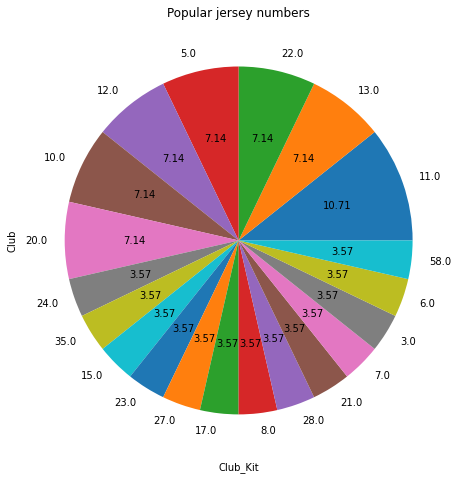

In [52]:
temp_df['Club_Kit'].value_counts().plot.pie(figsize=(8, 8), autopct='%.2f')
plt.title("Popular jersey numbers")
plt.ylabel('Club')
plt.xlabel('Club_Kit');

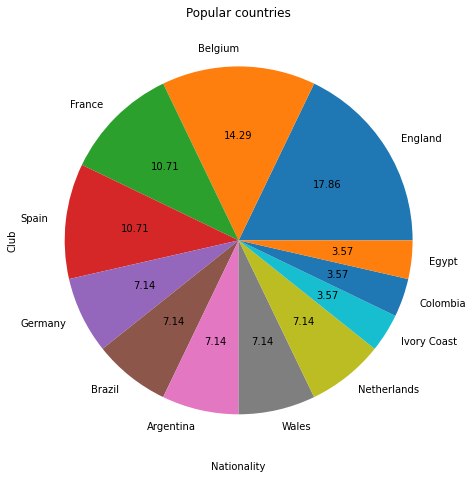

In [54]:
temp_df['Nationality'].value_counts().plot.pie(figsize=(8, 8), autopct='%.2f')
plt.title("Popular countries")
plt.ylabel('Club')
plt.xlabel('Nationality');